#                                 <font color=Black>TRIP ADVISER Review Analysis </font>

## Data Source

 As part of this analysis, we analyze the Hotel reviews from **Tripadviser**. we could find the [Trip Adviser dataset here](https://github.com/kavgan/OpinRank). This analysis is focused to **Word Embeddings** technique.

In [1]:
# Required Packages

import matplotlib.pyplot as plt
import numpy as np
import string
import os
import pandas as pd
import sys
import re


import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk

import datetime

In [76]:
#Selecting cities and data path
DataPath="C:\\Users\\bsubramani\\Downloads\\Python Scripts\\Data\\Text-Visualization-Blog-2-Dimensionality-Reduction-master\\OpinRankDatasetWithJudgments\\hotels\\data\\"
DataPath="E:\\Techi\\Courses\\Masters in Data Science\\Courses\\Text Visualization\\Data sets\\Trip Advisor\\hotels\\data\\"
Cities=['new-delhi','beijing', 'chicago', 'dubai', 'las-vegas', 'london', 'montreal',  'new-york-city', 'san-francisco', 'shanghai']
Custom_Stopwords=["nan","quot","hotel","room"]

## Data Retrivel and Processing

Below code collect reviews from all files and append it.

In [3]:
Dataset=pd.read_csv(DataPath+"text.txt", names=['Date','Title','Content'], delimiter="\t", index_col=3, encoding = "ISO-8859-1")
Dataset["City"]="Test"
Dataset.reset_index()
for city in Cities :
    print("Started : "+city)
    for i in os.listdir(DataPath+city+"\\"):
        try :
            Dataset2=pd.read_csv(DataPath+city+"\\"+i, names=['Date','Title','Content'], delimiter="\t", index_col=3, encoding = "ISO-8859-1")
            Dataset2.reset_index()
            Dataset2["City"]=city
            Dataset2["Hotel"]=i
            Dataset=pd.concat([Dataset,Dataset2],ignore_index=True,axis=0, sort=True)
        except :
            print(city+"\\"+i+" file is corrupted")
    print("Completed : "+city)


Started : new-delhi
Completed : new-delhi
Started : beijing
Completed : beijing
Started : chicago
chicago\usa_illinois_chicago_the_whitehall_hotel file is corrupted
Completed : chicago
Started : dubai
dubai\are_dubai_towers_rotana_dubai file is corrupted
Completed : dubai
Started : las-vegas
Completed : las-vegas
Started : london
london\uk_england_london_best_western_phoenix_hotel file is corrupted
london\uk_england_london_hilton_london_green_park file is corrupted
london\uk_england_london_merlyn_court_hotel file is corrupted
london\uk_england_london_st_david_s_hotels file is corrupted
Completed : london
Started : montreal
Completed : montreal
Started : new-york-city
new-york-city\usa_new york city_park_central file is corrupted
new-york-city\usa_new york city_the_mave file is corrupted
new-york-city\usa_new york city_the_mercer_hotel file is corrupted
new-york-city\usa_new york city_the_milburn_hotel file is corrupted
Completed : new-york-city
Started : san-francisco
Completed : san-f

## Extracting date features

In [5]:
#Dataset["Date"]=pd.to_datetime(Dataset["Date"])
#Dataset.index=Dataset.Date
#Dataset["Year"]=Dataset.index.year
#Dataset["Month"]=Dataset.index.month

## Extracting hotel ratings

In [7]:
city_review=pd.read_csv(DataPath+"city_text.txt", header=0 , delimiter="\t",encoding = "ISO-8859-1")
for city in Cities :
   
    try :
        city_review2=pd.read_csv(DataPath+city+".csv",header=0 , delimiter=",",  encoding = "ISO-8859-1",index_col=False)
        city_review=pd.concat([city_review,city_review2],ignore_index=True,axis=0, sort=True)
    except :
        print(city+"\\"+i+" file is corrupted")
city_review['overall_ratingsource']=city_review['overall_ratingsource'].replace(-1,np.NaN)
# city_review[['doc_id','country','overall_ratingsource']]

In [102]:
sno = nltk.stem.SnowballStemmer('english')
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(sno.stem(token))
    return result

def create_sentence(rule):
    print('Reading the sentence Started : '+str(datetime.datetime.now()))
#    print(len(Dataset["Content"][rule]))
    Sentences=[]
    for review in Dataset["Content"][rule]:
        if pd.isnull(review)== False and review!='':
            tokens = preprocess(review)
            tokens=[x for x in tokens if x not in Custom_Stopwords]
            Sentences.append(tokens)
            
            #print(tokens)
    print('Reading the sentence Completed : '+str(datetime.datetime.now()))
    print('Total Sentences '+str(len(Sentences)))
    return Sentences

def corpora_dict_model(sentence1):
    dictionary = corpora.Dictionary(sentence1)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in sentence1]
    print('Creating the model is starting : '+str(datetime.datetime.now()))
    # Running and Trainign LDA model on the document term matrix.
    ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, #passes=50, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
    print('Creating the model is completed : '+str(datetime.datetime.now()))
    return (doc_term_matrix,ldamodel)

def samplesenteneces(Sentences1, limit=1000):
    if (len(Sentences1) >= limit) :
        print('Before restricting (size) : '+str(len(Sentences1)))
        Sentences1=list(pd.Series(Sentences1).dropna()[np.linspace(0,len(Sentences1),limit,dtype='int')])
        print('After restricting (size) : '+str(len(Sentences1)))
        return list(pd.Series(Sentences1).dropna())
    else :
        print('Sentence size already with in a limit (size) : '+str(len(Sentences1)))
        return list(pd.Series(Sentences1).dropna())
    


In [105]:
highlowrated_sentence=create_sentence( Dataset['Hotel'].isin(list(city_review[(city_review['overall_ratingsource']<=2) | (city_review['overall_ratingsource']>=4.7)]['doc_id'])) )

Reading the sentence Started : 2019-05-11 14:28:26.480360
Reading the sentence Completed : 2019-05-11 14:29:06.837668
Total Sentences 3939


In [185]:
Filtered_cities=[]
for review in Dataset["Content"][Dataset['Hotel'].isin(list(city_review[(city_review['overall_ratingsource']<=2) | (city_review['overall_ratingsource']>=4.7)]['doc_id']))]:
        if pd.isnull(review)== False and review!='':
            Filtered_cities.append(Dataset["City"][Dataset["Content"]==review])

In [232]:
ny_doc_term_matrix=[]
for x in range(len(Filtered_cities)):
    if list(Filtered_cities[x])[0]=="new-york-city" :
        ny_doc_term_matrix.append(doc_term_matrix[x])

In [147]:
dictionary = corpora.Dictionary(highlowrated_sentence)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in highlowrated_sentence]
print('Creating the model is starting : '+str(datetime.datetime.now()))
# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=4, id2word = dictionary, #passes=50, 
                                       random_state=100,
                                       update_every=1,
                                       chunksize=100,
                                       passes=10,
                                       alpha='auto',
                                       per_word_topics=True)

print('Creating the model is completed : '+str(datetime.datetime.now()))

Creating the model is starting : 2019-05-11 15:40:19.186033
Creating the model is completed : 2019-05-11 15:46:20.305688


In [148]:
def format_topics_sentences(ldamodel=None, corpus=doc_term_matrix, texts=highlowrated_sentence):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.5027,"stay, night, place, look, book, like, check, door, clean, work","[compar, american, standard, guess, best, place, stay, money, comparison, india, standard, wasn,..."
1,1,1.0,0.8788,"stay, night, place, look, book, like, check, door, clean, work","[wrote, mail, reserv, includ, airport, pick, wait, took, paid, taxi, recept, reserv, peopl, took..."
2,2,1.0,0.4682,"stay, night, place, look, book, like, check, door, clean, work","[unavail, star, compel, stay, transit, flight, pros, staff, good, airport, pickup, dropcon, dirt..."
3,3,1.0,0.8008,"stay, night, place, look, book, like, check, door, clean, work","[stay, night, near, delhi, airport, wait, connect, flight, know, spent, night, airport, instead,..."
4,4,1.0,0.7071,"stay, night, place, look, book, like, check, door, clean, work","[decid, stay, night, layov, airport, nepal, outward, journey, stay, clark, intern, amaz, includi..."
5,5,1.0,0.5658,"stay, night, place, look, book, like, check, door, clean, work","[unexpect, layov, delhi, airport, necessay, quick, end, spur, moment, airport, delhi, close, del..."
6,6,1.0,0.8125,"stay, night, place, look, book, like, check, door, clean, work","[transit, delhi, surat, gujarat, decid, spend, night, close, worst, decis, life, possibl, worst,..."
7,7,2.0,0.5102,"locat, breakfast, area, walk, good, stay, nice, great, street, small","[high, rate, complic, check]"
8,8,3.0,0.6672,"stay, staff, servic, love, great, time, night, wonder, suit, best","[great, erstwhil, lodhi, site, aman, stand, locat, best, locat, citi, lodhi, road, aman, luxuri,..."
9,9,3.0,0.6755,"stay, staff, servic, love, great, time, night, wonder, suit, best","[view, year, aman, delhi, amaz, stay, children, famili, stay, bedroom, suit, floor, build, huge,..."


In [149]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.4494,"heritag, marina, golden, beach, verona, wharf, pool, view, gate, mina","[amaz, definit, recommend, jumeirah, chain, connect, resort, qasr, madinat, masyaf, jumeirah, be..."
1,1.0,0.9710,"stay, night, place, look, book, like, check, door, clean, work","[partner, stay, hellhol, night, book, stay, chester, longmoor, street, arriv, told, book, arriv,..."
2,2.0,0.9251,"locat, breakfast, area, walk, good, stay, nice, great, street, small","[want, doubl, space, half, price, appart, stay, nice, properti, courteous, staff, wonder, space,..."
3,3.0,0.9576,"stay, staff, servic, love, great, time, night, wonder, suit, best","[daughter, husband, recommend, year, impress, visit, love, stay, stay, regular, staff, wonder, f..."


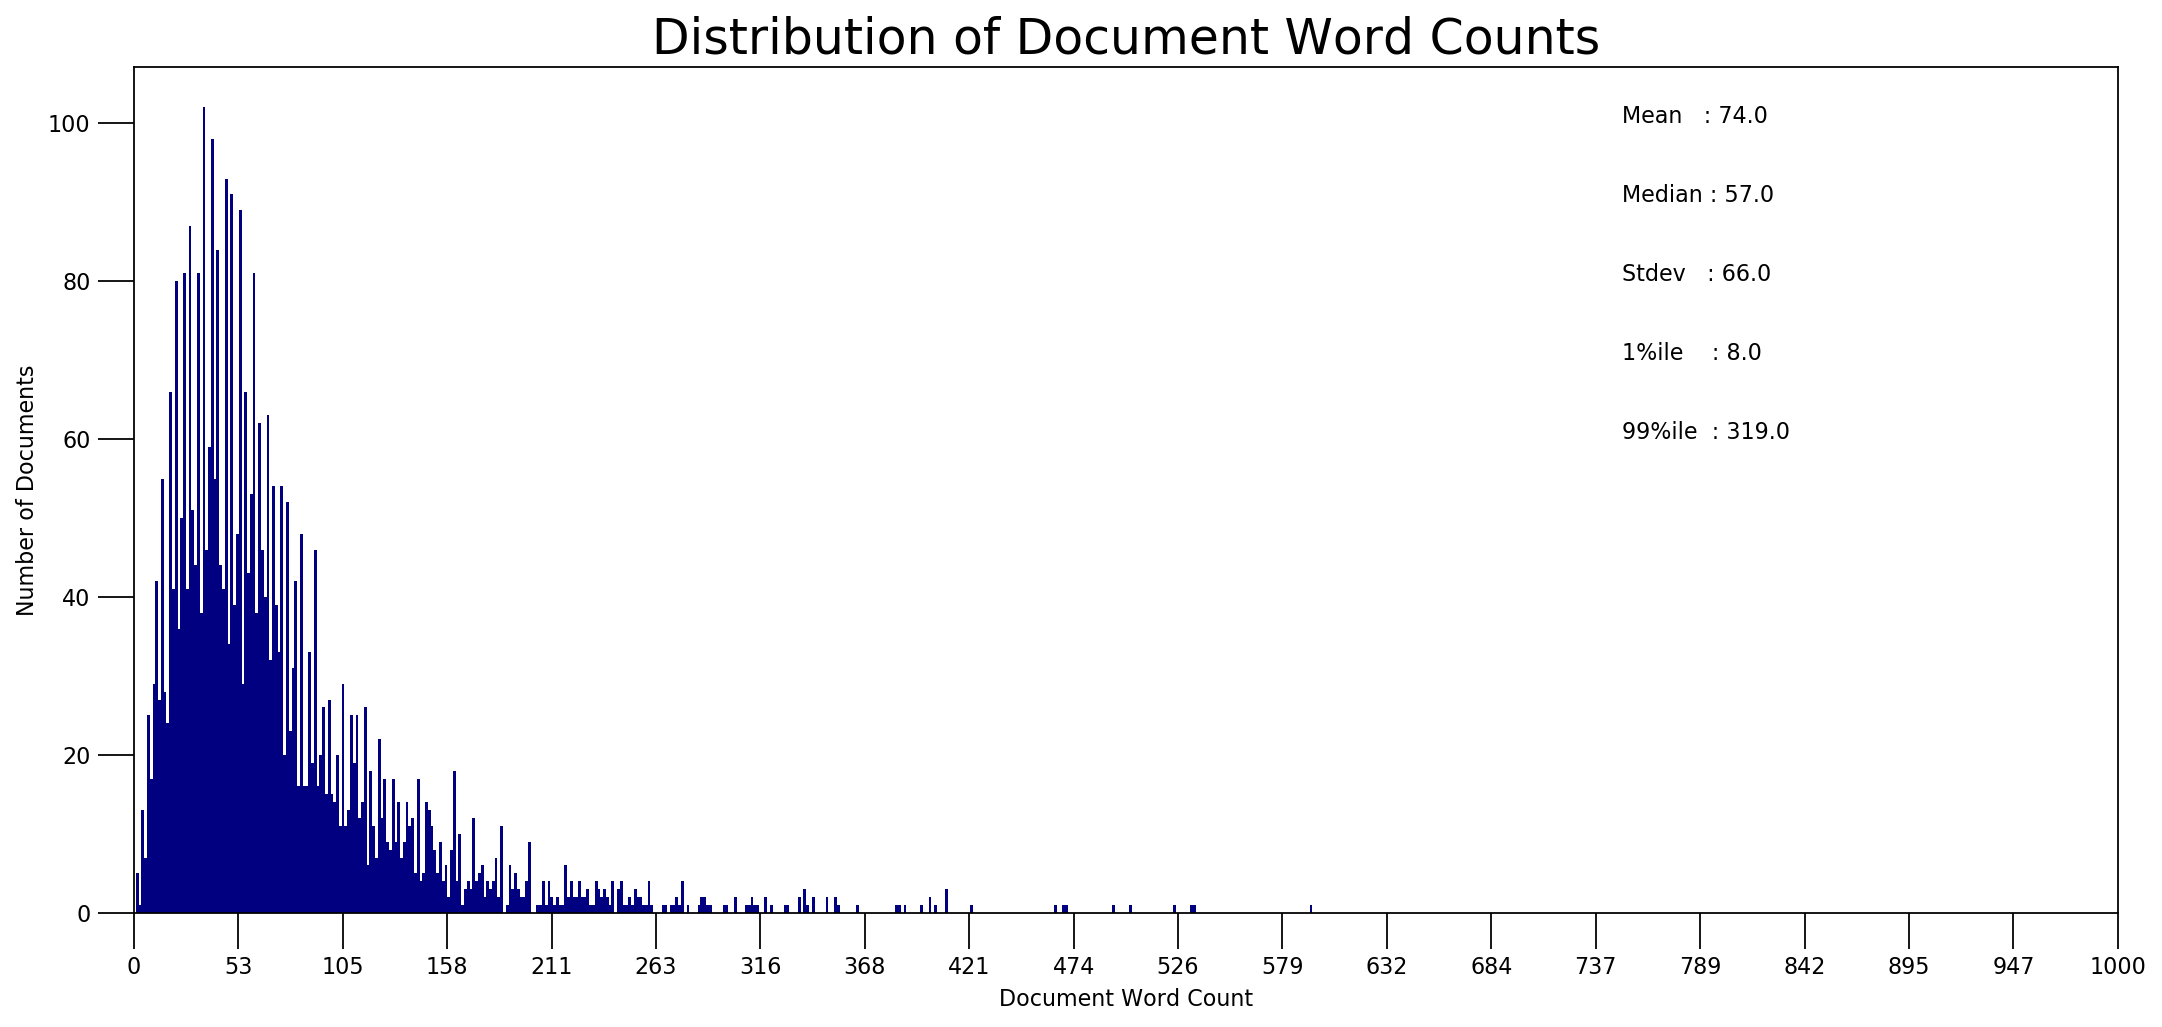

In [150]:
# Frequency Distribution of Word Counts in Documents

doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,20))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

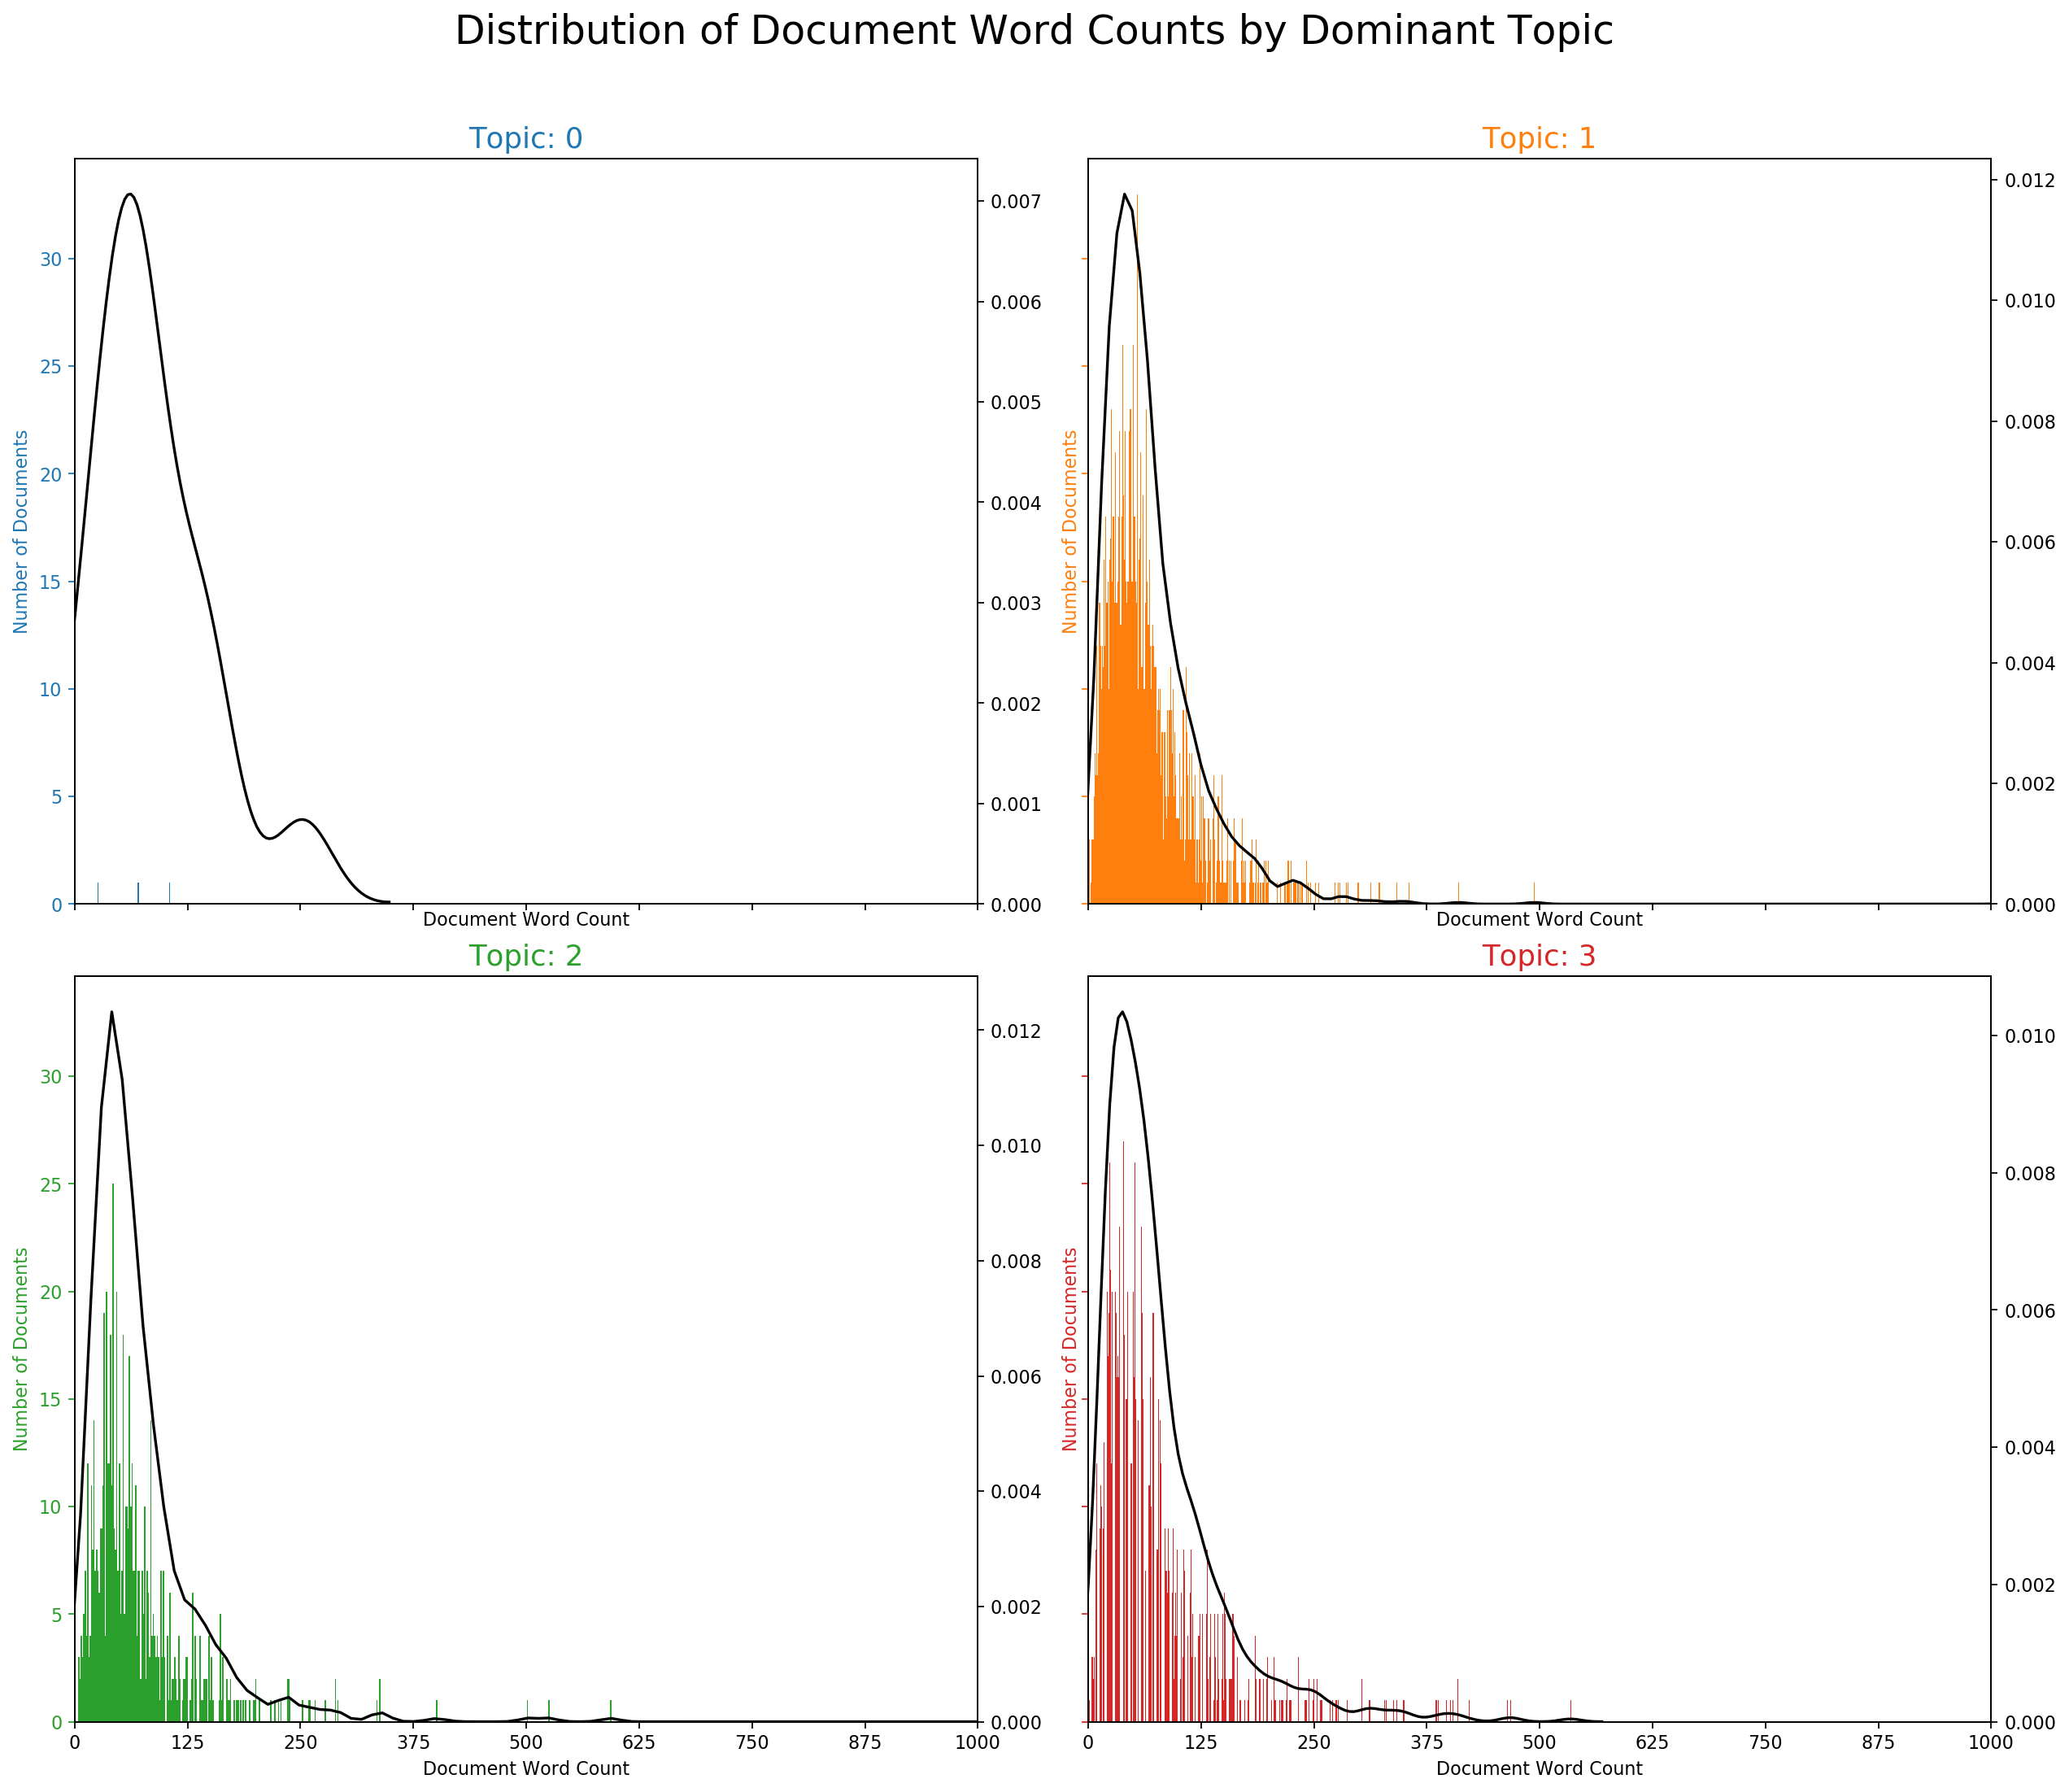

In [151]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show();

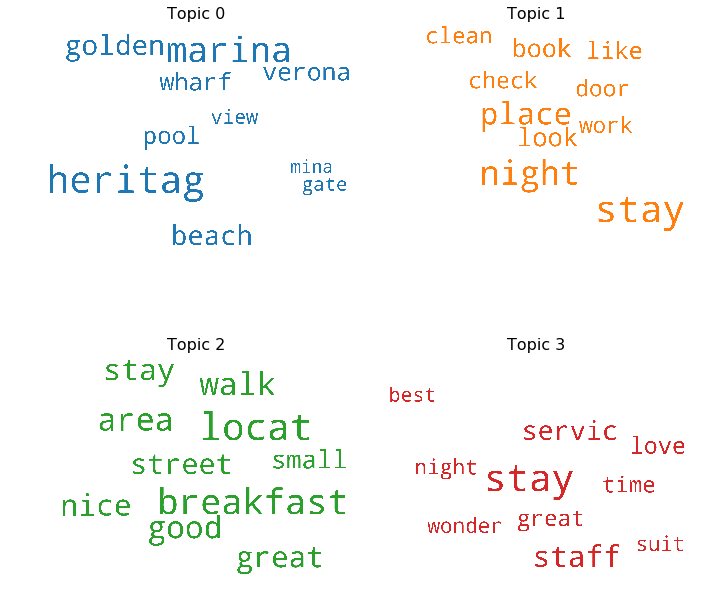

In [152]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(#stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

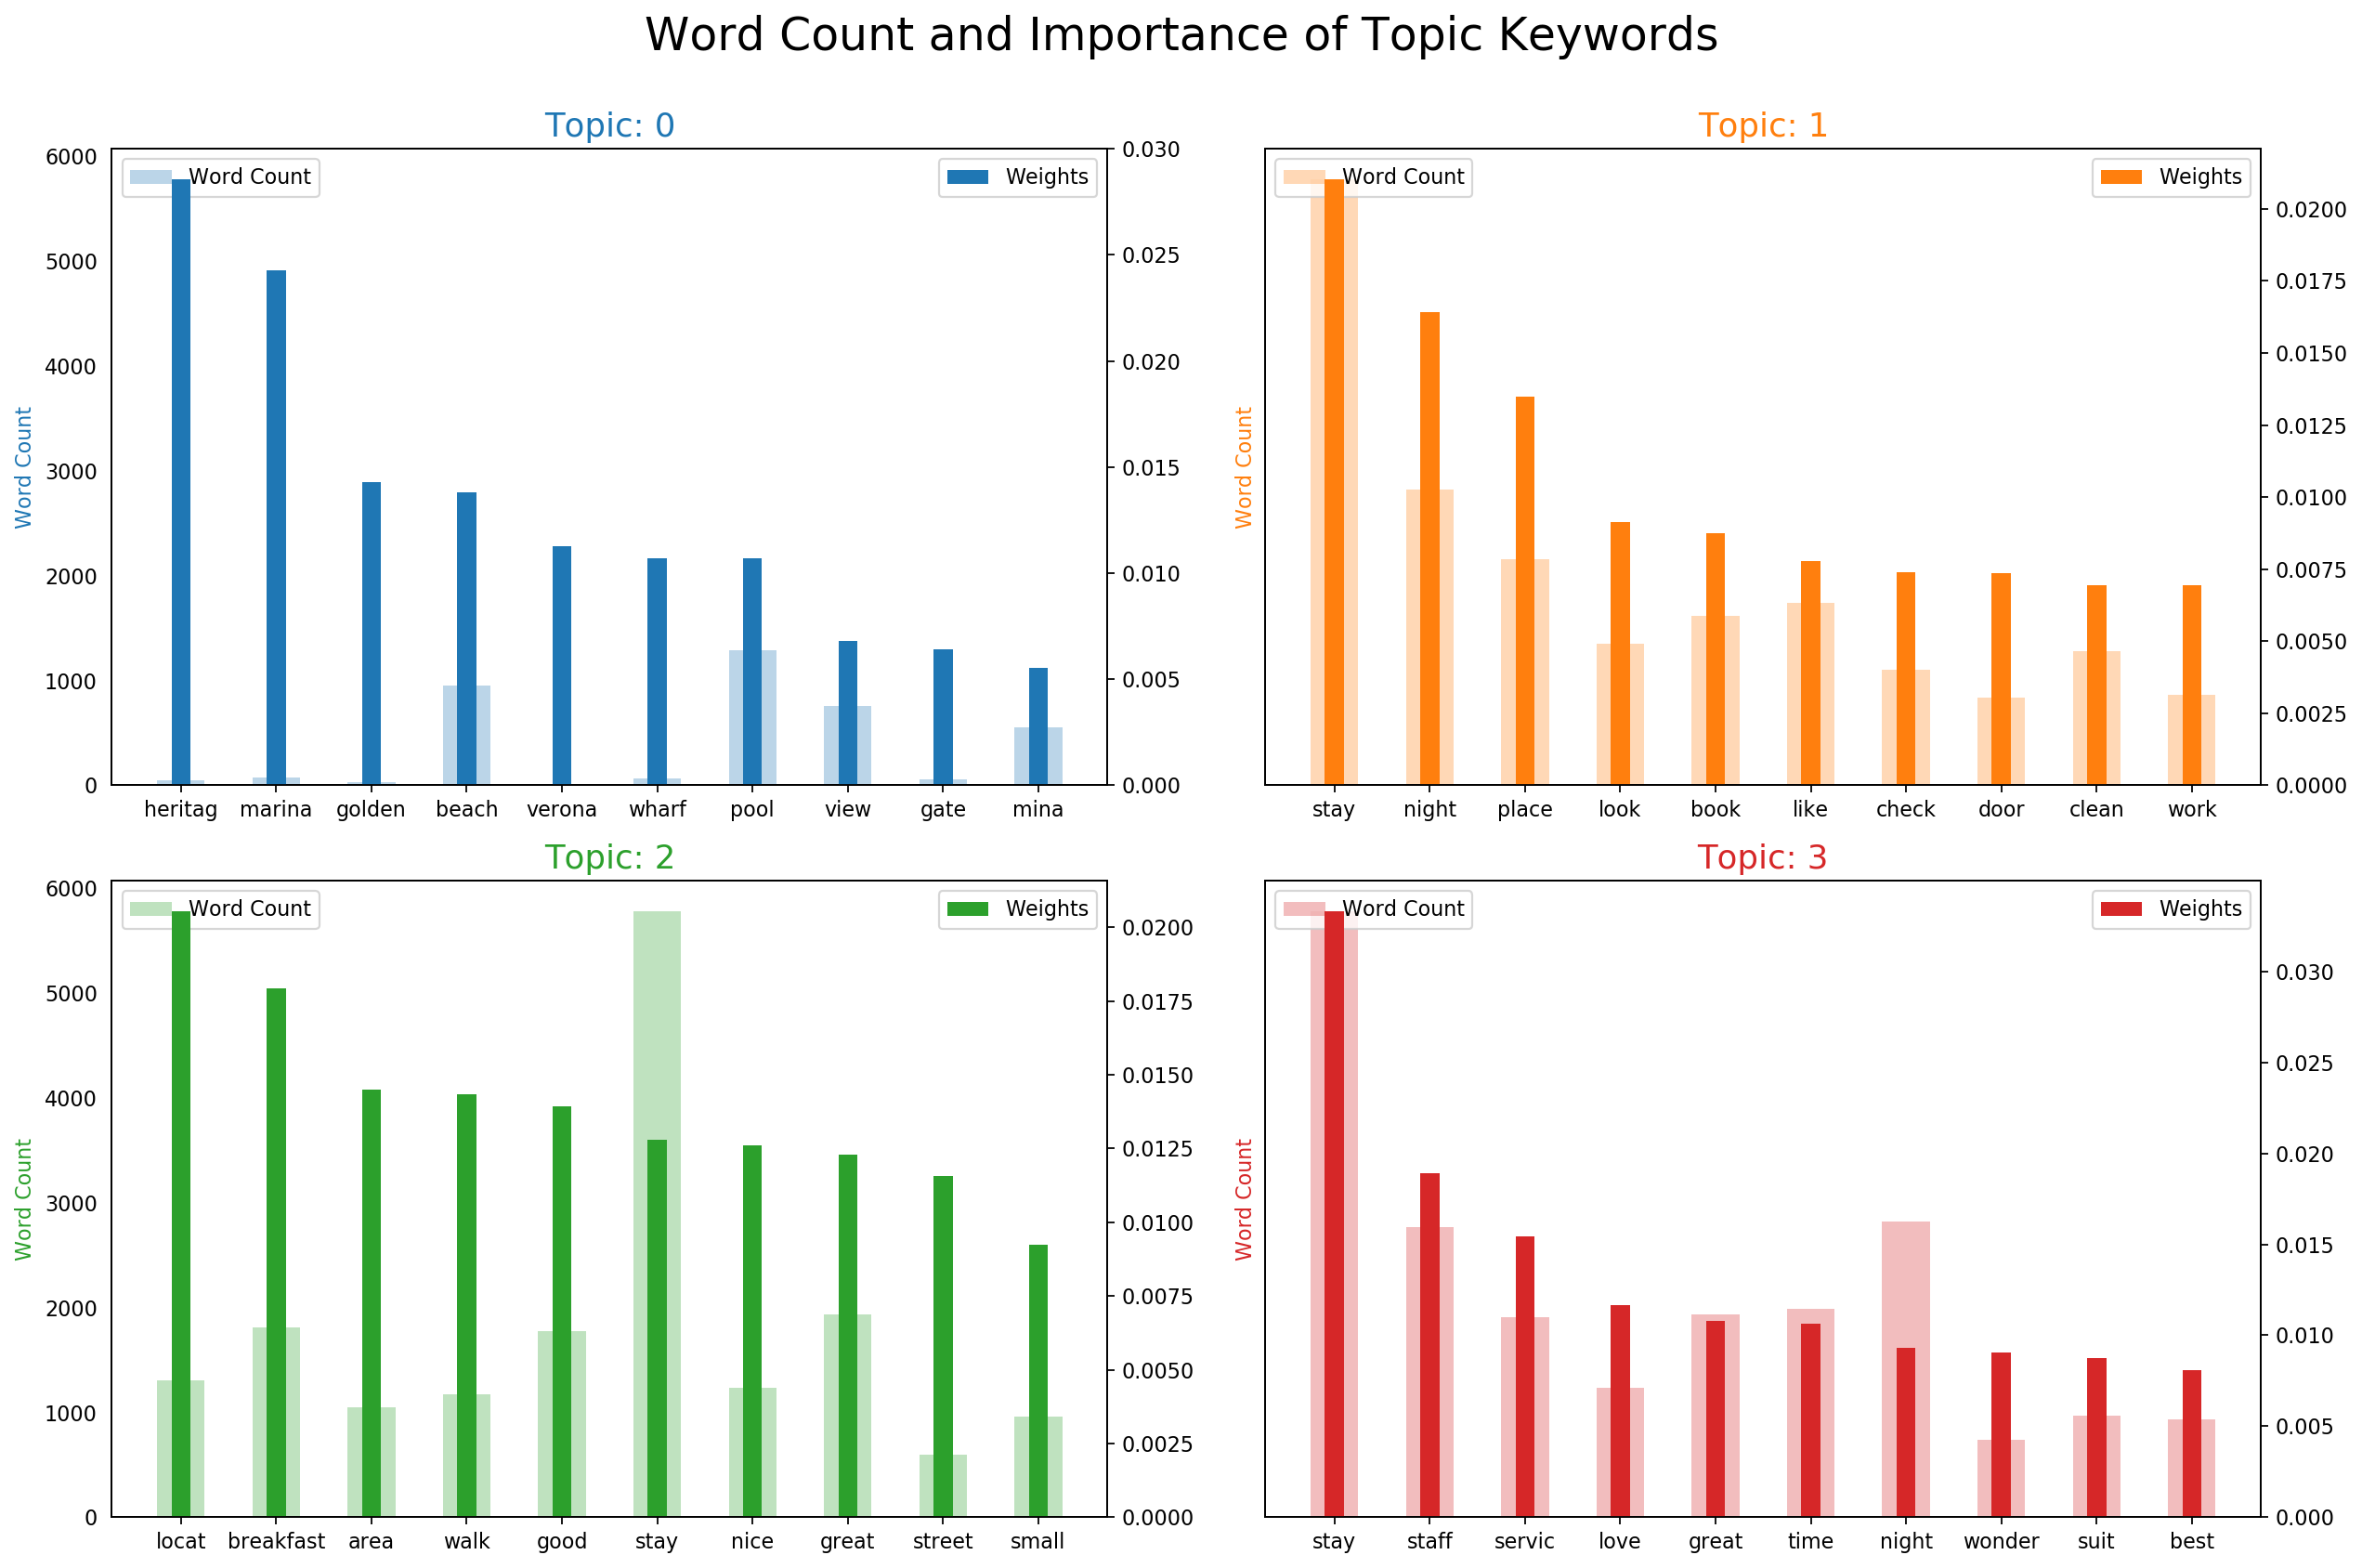

In [164]:
from collections import Counter
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in highlowrated_sentence for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    #ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 4000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

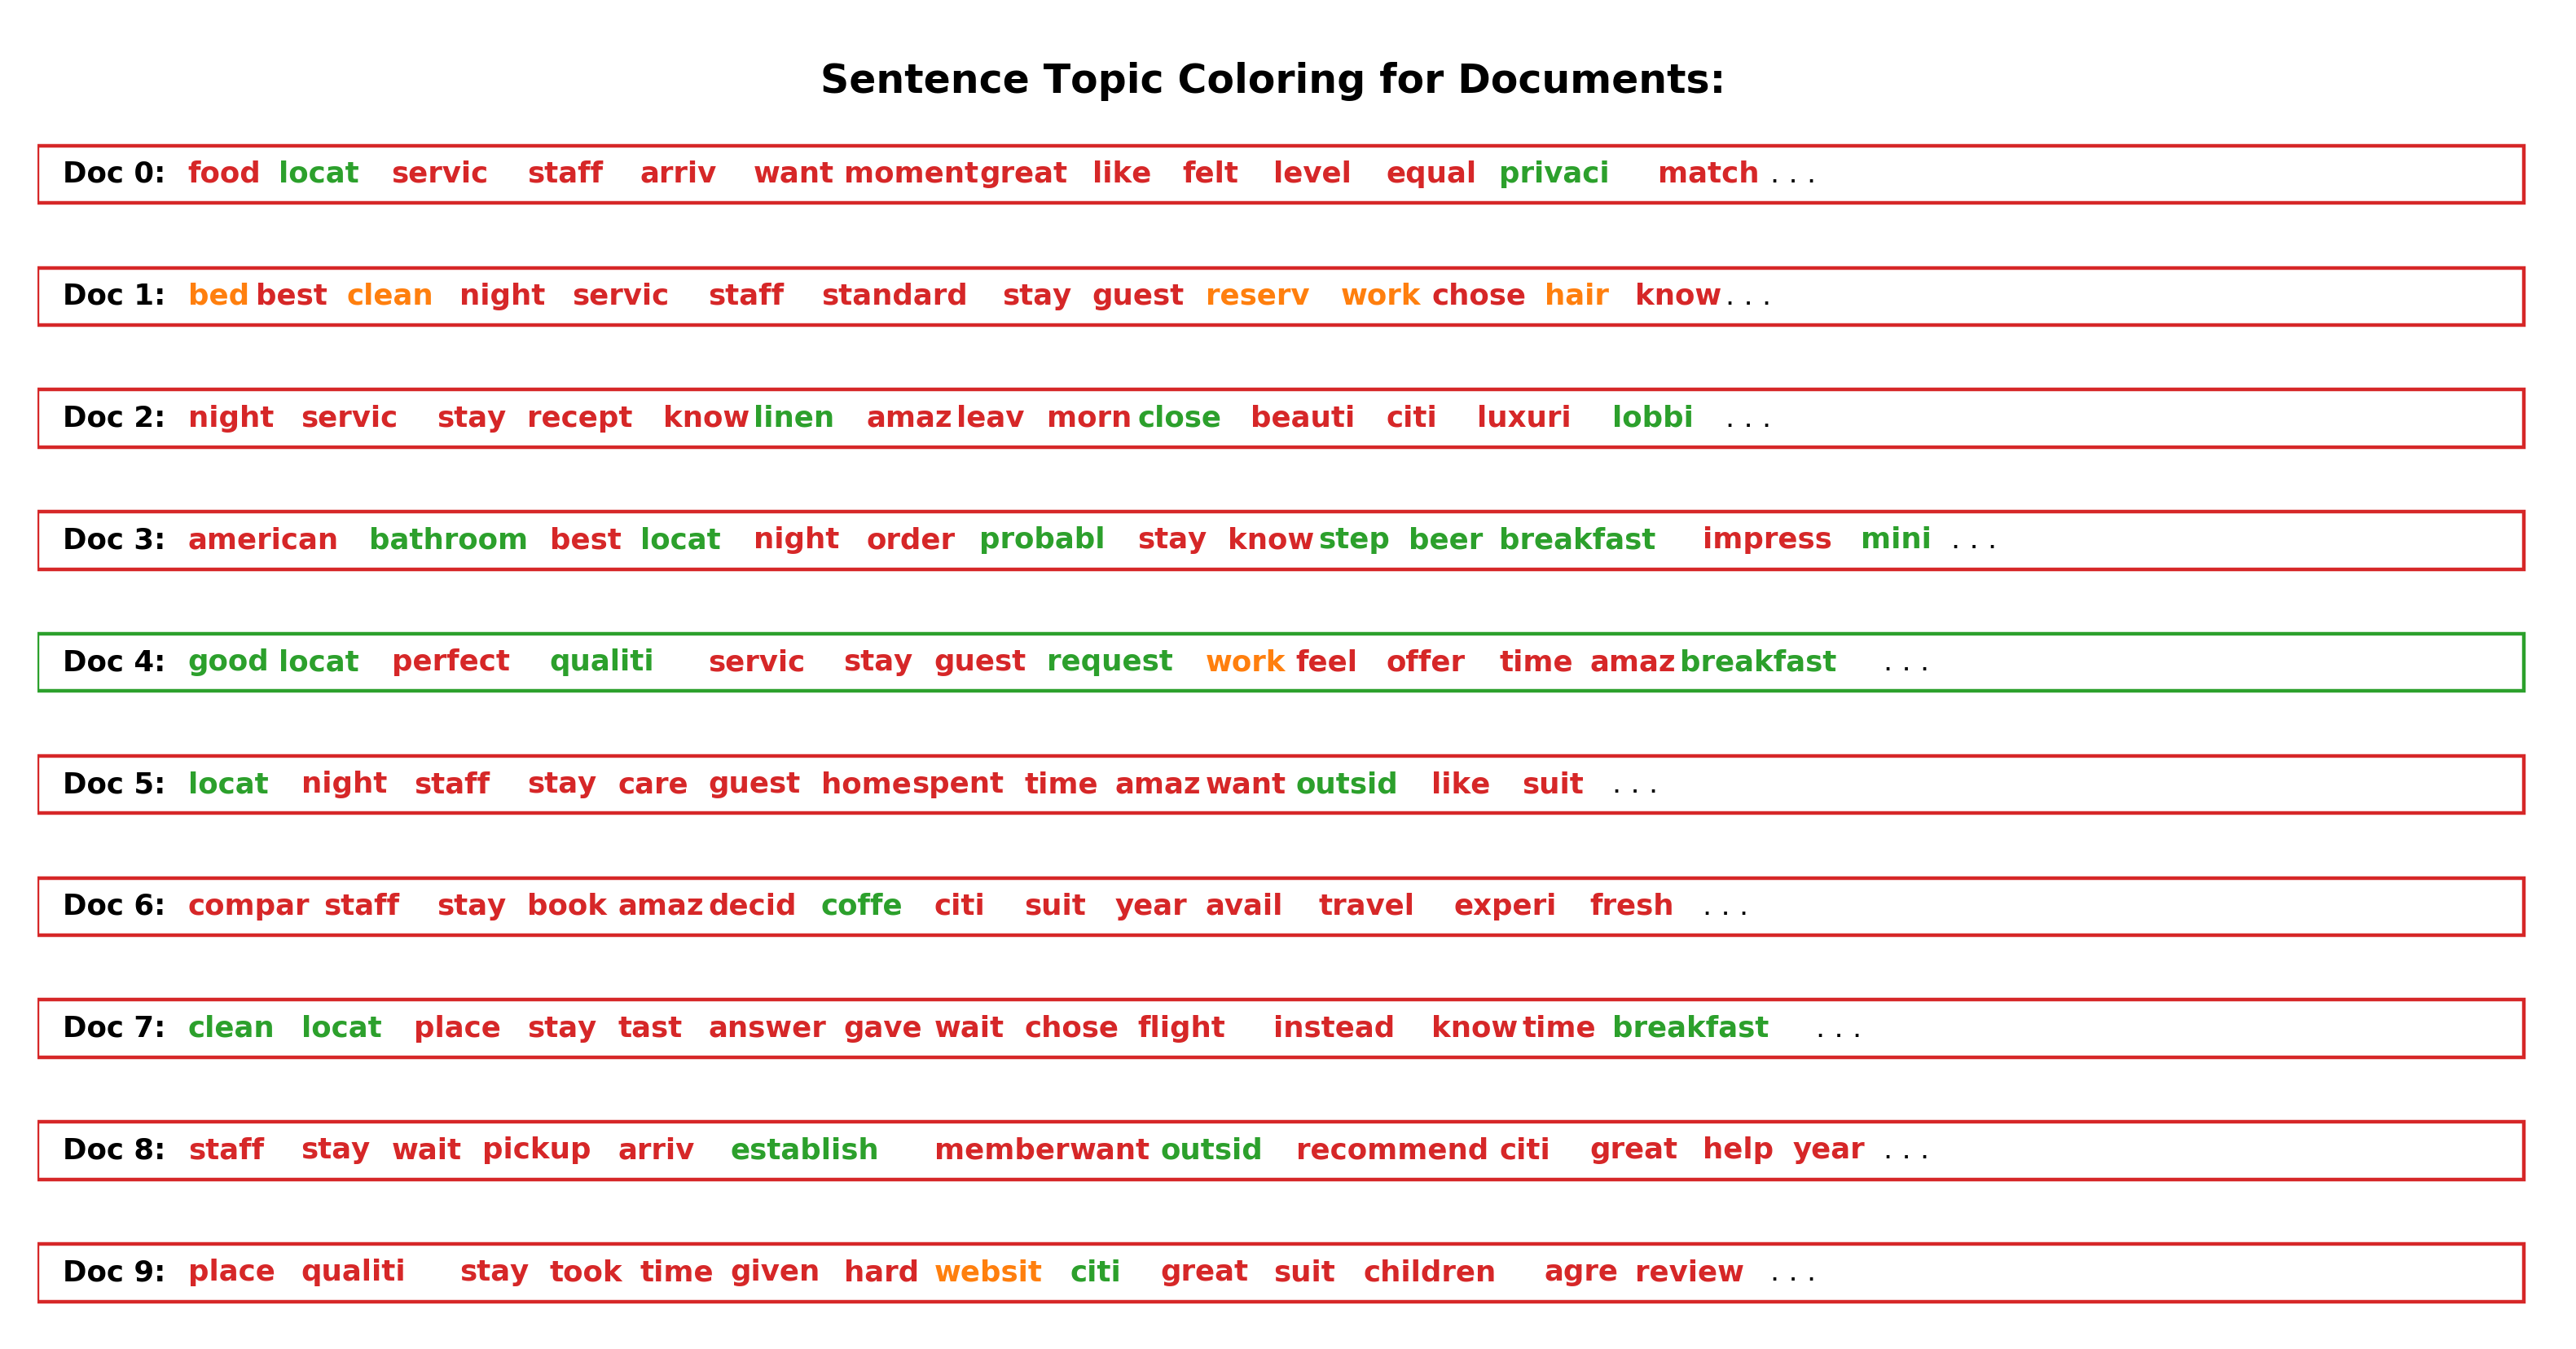

In [236]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=ldamodel, corpus=ny_doc_term_matrix, start = 0, end = 11):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ', fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()

In [158]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(ldamodel[doc_term_matrix]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3887 samples in 0.072s...
[t-SNE] Computed neighbors for 3887 samples in 0.722s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3887
[t-SNE] Computed conditional probabilities for sample 2000 / 3887
[t-SNE] Computed conditional probabilities for sample 3000 / 3887
[t-SNE] Computed conditional probabilities for sample 3887 / 3887
[t-SNE] Mean sigma: 0.025535
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.205128
[t-SNE] KL divergence after 1000 iterations: 0.716708


Loading BokehJS ...

In [162]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary=ldamodel.id2word)
vis

C:\Users\Dell\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.117635 -0.119191       1        1  36.212883
3     -0.113833 -0.102755       2        1  35.294456
2     -0.102639  0.228672       3        1  23.201244
0      0.334106 -0.006726       4        1   5.291411, topic_info=      Category         Freq       Term        Total  loglift  logprob
term                                                                 
17     Default  1557.000000      locat  1557.000000  30.0000  30.0000
147    Default  1561.000000  breakfast  1561.000000  29.0000  29.0000
8876   Default   441.000000    heritag   441.000000  28.0000  28.0000
330    Default  1051.000000       area  1051.000000  27.0000  27.0000
207    Default  1242.000000       walk  1242.000000  26.0000  26.0000
31     Default  1755.000000     servic  1755.000000  25.0000  25.0000
4172   Default   373.000000     marina   373.000000  24.0000  24.0000
270    Default  1930.000000      great  1930.000000  23.0000  23.0000
479    Default  1236.000000       love  1236.000000  22.0000  22.0000
1043   Default   979.000000     street   979.000000  21.0000  21.0000
369    Default  1092.000000       nice  1092.000000  20.0000  20.0000
33     Default  2439.000000      staff  2439.000000  19.0000  19.0000
12     Default  1401.000000       good  1401.000000  18.0000  18.0000
279    Default   454.000000       pool   454.000000  17.0000  17.0000
527    Default   964.000000     wonder   964.000000  16.0000  16.0000
2099   Default   802.000000   shanghai   802.000000  15.0000  15.0000
285    Default   860.000000      small   860.000000  14.0000  14.0000
322    Default   626.000000       view   626.000000  13.0000  13.0000
195    Default  1224.000000    restaur  1224.000000  12.0000  12.0000
4656   Default   278.000000      wharf   278.000000  11.0000  11.0000
47     Default   660.000000      dirti   660.000000  10.0000  10.0000
294    Default   641.000000      visit   641.000000   9.0000   9.0000
551    Default   220.000000     golden   220.000000   8.0000   8.0000
260    Default   729.000000     beauti   729.000000   7.0000   7.0000
3107   Default   213.000000      beach   213.000000   6.0000   6.0000
6      Default  1228.000000      clean  1228.000000   5.0000   5.0000
1883   Default   882.000000       park   882.000000   4.0000   4.0000
4      Default   919.000000       best   919.000000   3.0000   3.0000
470    Default   591.000000    fantast   591.000000   2.0000   2.0000
363    Default   480.000000       larg   480.000000   1.0000   1.0000
...        ...          ...        ...          ...      ...      ...
5091    Topic4    37.516804   distress    38.461834   2.9142  -6.0141
1702    Topic4    35.165836      entri    36.060833   2.9140  -6.0788
4304    Topic4    30.349688       souk    31.125757   2.9138  -6.2261
3254    Topic4    30.498964       boat    31.289755   2.9135  -6.2212
3400    Topic4    30.492355     safari    31.310122   2.9126  -6.2214
4165    Topic4    28.851557    madinat    29.627892   2.9125  -6.2767
3105    Topic4    34.489220      utter    35.423988   2.9123  -6.0982
3508    Topic4    33.718266      curri    34.694859   2.9105  -6.1209
3095    Topic4    36.741047    concert    37.806236   2.9105  -6.0350
4327    Topic4    26.769690       palm    27.566977   2.9097  -6.3516
3758    Topic4    32.960754      tempt    33.958458   2.9093  -6.1436
2600    Topic4    29.484344       john    30.386002   2.9090  -6.2550
3744    Topic4    25.370485       wild    26.158575   2.9085  -6.4053
2567    Topic4    48.176857       deck    49.698101   2.9080  -5.7640
4936    Topic4    31.901398      reloc    33.056255   2.9035  -6.1762
3274    Topic4    36.048439      humor    37.594124   2.8971  -6.0540
12988   Topic4   172.843735     verona   200.312286   2.7916  -4.4865
4975    Topic4    35.322769      vodka    36.830273   2.8973  -6.0744
1464    Topic4    40.273785      multi    43.032364   2.8728  -